In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["svg.fonttype"] = "none"  # Ensures the text is not converted to paths


In [2]:
clusters_all = pd.read_csv("Results/machine_learning_results/cluster_assignment_file/cluster_of_all_model.tsv", sep="\t")
clusters_all_set_cluster0 = set(clusters_all[clusters_all["Cluster"] == 0]["transcript_id"])
clusters_all_set_cluster1 = set(clusters_all[clusters_all["Cluster"] == 1]["transcript_id"])

In [3]:
clusters_naive = pd.read_csv("Results/machine_learning_results/cluster_assignment_file/sequence:global_iclip:paris_intramol:postar3_joined_clusters.tsv", sep="\t")
clusters_naive_set_cluster0 = set(clusters_naive[clusters_naive["Cluster"] == 0]["transcript_id"])
clusters_naive_set_cluster1 = set(clusters_naive[clusters_naive["Cluster"] == 1]["transcript_id"])


In [4]:
merged = clusters_all.merge(clusters_naive, on="transcript_id", suffixes=("_all", "_naive"))
merged

,transcript_id,Cluster_all,Cluster_naive
0,ENSMUST00000000312.12,0,0
1,ENSMUST00000000314.13,0,0
2,ENSMUST00000002121.5,0,0
3,ENSMUST00000002320.16,0,0
4,ENSMUST00000002889.5,0,0
...,...,...,...
442,ENSMUST00000236879.2,0,0
443,ENSMUST00000237947.2,1,1
444,ENSMUST00000238606.2,0,0
445,ENSMUST00000238821.2,0,0


In [5]:
same_cluster = merged[merged["Cluster_all"] == merged["Cluster_naive"]]
percentage = len(same_cluster)/len(merged)
percentage

0.9574944071588367

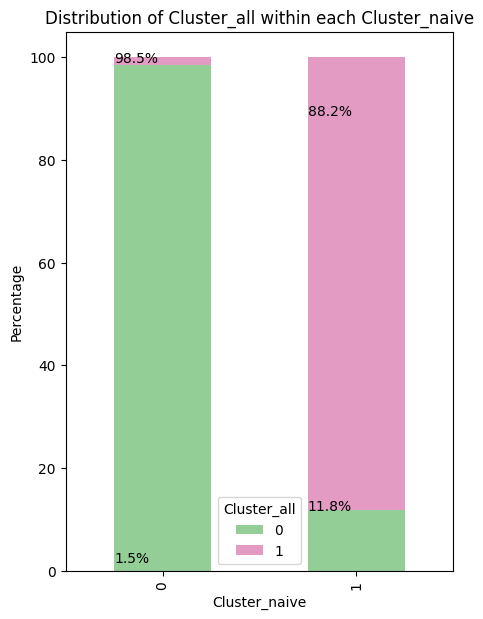

In [18]:
distribution = merged.groupby('Cluster_naive')['Cluster_all'].value_counts(normalize=True).unstack().fillna(0) * 100

fig, ax = plt.subplots(figsize=(5, 7))
distribution.plot(kind='bar', stacked=True, ax=ax, color=['#94CE97', '#E39BC4'])

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 1)) + "%", (p.get_x() * 1.0, p.get_height() * 1.005))
ax.set_ylabel('Percentage')
ax.set_title('Distribution of Cluster_all within each Cluster_naive')
ax.legend(title='Cluster_all')

plt.show()